# Estimation of Autocorrelation Function 

## (2d Ising model on Square Lattice)

In [1]:
import numpy as np
import numba as nb

In [2]:
import csv
import pickle
import time
from tqdm.auto import trange

In [3]:
import matplotlib.pyplot as plt

In [4]:
types_corr_k_steps_est = nb.types.Tuple((nb.float64, nb.float64, nb.float64[:]))(nb.float32[:], nb.int64)
@nb.cfunc(types_corr_k_steps_est, parallel=True)
def corr_k_step_est(sample_array, k_steps_max):
    """
    Args:
        mc_list: (np.array)
        k_steps: (int)
    Return:
        corr_coef: (float)
    """
    sample_len = len(sample_array)
    num_i_steps = sample_len - k_steps_max
    q_mean = np.mean(sample_array[:num_i_steps])
    q_square_mean = np.mean(np.square(sample_array[:num_i_steps]))
    qqk_sum = np.zeros(k_steps_max)
    for i in range(num_i_steps):
        samples_k_sub = sample_array[i:i+k_steps_max+1]
        for j in range(1, k_steps_max+1):
            qqk_sum[j-1] += (samples_k_sub[0] * samples_k_sub[j])
    qqk_array = qqk_sum / num_i_steps
    return (q_mean, q_square_mean, qqk_array)

In [5]:
@nb.njit(parallel=True)
def autocorr_mc(mc_array, k_steps_max):
    m_times = mc_array.shape[0]
    qqk_mean_mc, qqk_mean_std_mc = np.zeros(k_steps_max), np.zeros(k_steps_max)
    q_mean_array, q_square_mean_array, qqk_double_array = np.zeros(m_times), np.zeros(m_times), np.zeros((m_times, k_steps_max))
    for i in range(m_times):
        q_mean, q_square_mean, qqk_array = corr_k_step_est(mc_array[i], k_steps_max)
        q_mean_array[i] = q_mean
        q_square_mean_array[i] = q_square_mean
        qqk_double_array[i] = qqk_array
    for i in range(k_steps_max):
        qqk_mean_mc_i = np.mean(qqk_double_array[:, i])
        qqk_mean_std_mc_i = np.std(qqk_double_array[:, i])
        qqk_mean_mc[i] = qqk_mean_mc_i
        qqk_mean_std_mc[i] = qqk_mean_std_mc_i / np.sqrt(m_times)
    ####################################################
    q_mean_mc = np.mean(q_mean_array)
    q_mean_std_mc = np.std(q_mean_array) / np.sqrt(m_times)
    q_square_mean_mc = np.mean(q_square_mean_array)
    q_square_mean_std_mc = np.std(q_square_mean_array) / np.sqrt(m_times)
    ####################################################
    q_mean = (q_mean_mc, q_mean_std_mc)
    q_square_mean = (q_square_mean_mc, q_square_mean_std_mc)
    qqk_mean = (qqk_mean_mc, qqk_mean_std_mc)
    ####################################################
    autocorr_mc = (qqk_mean_mc - q_mean_mc ** 2) / (q_square_mean_mc - q_mean_mc ** 2) 
    return autocorr_mc, q_mean, q_square_mean, qqk_mean

-----------
### 4 x 4 Square 2D Ising Model

In [7]:
with open('./data_2d_ising/m_ising2d_square_size_4', 'rb') as file:
    m_2dising_4_j_pos = pickle.load(file)

In [8]:
m_abs_2dising_4_j_pos = np.abs(m_2dising_4_j_pos)

In [9]:
m_abs_2dising_4_j_pos = m_abs_2dising_4_j_pos.reshape((10000, 2500))

In [10]:
time_start = time.time()
m_4_autocorr_mc, _, _, _ = autocorr_mc(m_abs_2dising_4_j_pos, 250)
time_end = time.time()
print(time_end-time_start)

142.908695936203


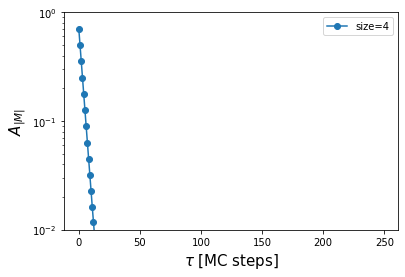

In [11]:
#plt.plot(np.log10(m_10_autocorr_mc), '-o')
plt.plot(m_4_autocorr_mc, '-o', label='size=4')
plt.yscale("log")
plt.ylim(10 ** (-2.5), 1)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{|M|}$', fontsize=15)
plt.legend()

-----------
### 8 x 8 Square 2D Ising Model

In [15]:
with open('./data_2d_ising/m_ising2d_square_size_8', 'rb') as file:
    m_2dising_8_j_pos = pickle.load(file)

In [16]:
m_abs_2dising_8_j_pos = np.abs(m_2dising_8_j_pos)

In [17]:
m_abs_2dising_8_j_pos = m_abs_2dising_8_j_pos.reshape((10000, 2500))

In [18]:
time_start = time.time()
m_8_autocorr_mc, _, _, _ = autocorr_mc(m_abs_2dising_8_j_pos, 250)
time_end = time.time()
print(time_end-time_start)

130.64985060691833


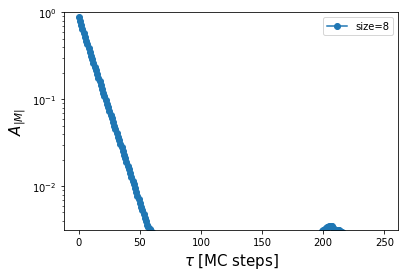

In [19]:
#plt.plot(np.log10(m_10_autocorr_mc), '-o')
plt.plot(m_8_autocorr_mc, '-o', label='size=8')
plt.yscale("log")
plt.ylim(10 ** (-2.5), 1)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{|M|}$', fontsize=15)
plt.legend()

-----------
### 16 x 16 Square 2D Ising Model

In [20]:
with open('./data_2d_ising/m_ising2d_square_size_16', 'rb') as file:
    m_2dising_16_j_pos = pickle.load(file)

In [21]:
m_abs_2dising_16_j_pos = np.abs(m_2dising_16_j_pos)

In [22]:
m_abs_2dising_16_j_pos = m_abs_2dising_16_j_pos.reshape((10000, 2500))

In [23]:
time_start = time.time()
m_16_autocorr_mc, _, _, _ = autocorr_mc(m_abs_2dising_16_j_pos, 250)
time_end = time.time()
print(time_end-time_start)

131.414644241333


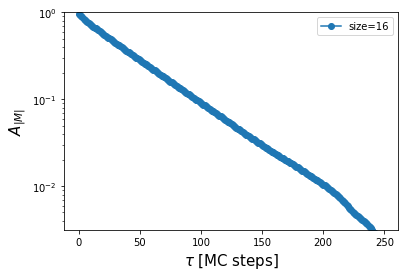

In [24]:
#plt.plot(np.log10(m_10_autocorr_mc), '-o')
plt.plot(m_16_autocorr_mc, '-o', label='size=16')
plt.yscale("log")
plt.ylim(10 ** (-2.5), 1)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{|M|}$', fontsize=15)
plt.legend()

-----------
### 32 x 32 Square 2D Ising Model

In [25]:
with open('./data_2d_ising/m_ising2d_square_size_32', 'rb') as file:
    m_2dising_32_j_pos = pickle.load(file)

In [26]:
m_abs_2dising_32_j_pos = np.abs(m_2dising_32_j_pos)

In [27]:
m_abs_2dising_32_j_pos = m_abs_2dising_32_j_pos.reshape((10000, 2500))

In [28]:
time_start = time.time()
m_32_autocorr_mc, _, _, _ = autocorr_mc(m_abs_2dising_32_j_pos, 250)
time_end = time.time()
print(time_end-time_start)

106.58283758163452


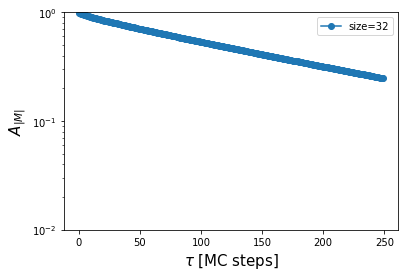

In [29]:
#plt.plot(np.log10(m_10_autocorr_mc), '-o')
plt.plot(m_32_autocorr_mc, '-o', label='size=32')
plt.yscale("log")
plt.ylim(10 ** (-2), 1)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{|M|}$', fontsize=15)
plt.legend()

--------------
#### Summary

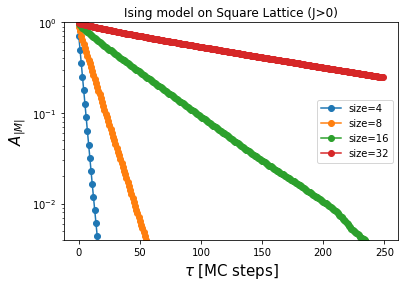

In [32]:
#plt.plot(np.log10(m_10_autocorr_mc), '-o')
plt.plot(m_4_autocorr_mc, '-o', label='size=4')
plt.plot(m_8_autocorr_mc, '-o', label='size=8')
plt.plot(m_16_autocorr_mc, '-o', label='size=16')
plt.plot(m_32_autocorr_mc, '-o', label='size=32')
plt.yscale("log")
plt.ylim(10 ** (-2.4), 1)
plt.xlabel(r'$\tau$ [MC steps]', fontsize=15)
plt.ylabel(r'$A_{|M|}$', fontsize=15)
plt.title("Ising model on Square Lattice (J>0)")
plt.legend()